In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree


In [2]:
df = pd.read_csv(r"/kaggle/input/fraud-detection/fraudTrain.csv")
#df.drop('Unnamed: 0', axis=1, inplace=True)

df_t = pd.read_csv(r"/kaggle/input/fraud-detection/fraudTest.csv")
#df_t.drop('Unnamed: 0', axis=1, inplace=True)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [4]:
df_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [5]:
df.drop(columns=['cc_num', 
                 'trans_date_trans_time', 
                 'gender', 
                 'dob', 
                 'street', 
                 'first', 
                 'last', 
                 'city', 
                 'state', 
                 'trans_num'], inplace=True)

df_t.drop(columns=['cc_num', 
                 'trans_date_trans_time', 
                 'gender', 
                 'dob', 
                 'street', 
                 'first', 
                 'last', 
                 'city', 
                 'state', 
                 'trans_num'], inplace=True)

In [6]:
df_t.__len__()

555719

In [7]:
print(len(df_t['job'].unique()),
len(df['job'].unique()),
len(df_t['merchant'].unique()),
len(df['merchant'].unique()))

478 494 693 693


In [8]:
df_1 = df[df["is_fraud"] == 0] 
df_0 = df[df["is_fraud"] == 1]
print(df_0.__len__())

df_trimmed = df_1.sample(n=6142, random_state=69)
len(df_trimmed)

df_comb = pd.concat([df_trimmed, df_0])
df_comb = df_comb.sample(frac = 1)

7506


In [9]:
X = df_comb.drop('is_fraud', axis=1).copy()
y = df_comb['is_fraud'].copy()

X_t = df_t.drop('is_fraud', axis=1).copy()
y_t = df_t['is_fraud'].copy()

In [10]:
df_15 = np.zeros(((len(X_t)), 15))
# df_2 = np.zeros(((len(X)), 2))

df_16 = np.hstack((df_15, X_t['Unnamed: 0'].to_numpy().reshape(-1, 1)))
# df_3 = np.hstack((df_2, X['Unnamed: 0'].to_numpy().reshape(-1, 1)))

df_16 = pd.DataFrame(df_16)
# df_3 = pd.DataFrame(df_3)

print(df_16.shape, X_t.shape)
df_16 = df_16.rename(columns = {15: "Unnamed: 0"})
df_16

(555719, 16) (555719, 12)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,Unnamed: 0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,555714.0
555715,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,555715.0
555716,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,555716.0
555717,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,555717.0


In [11]:
#X_tf = pd.merge_ordered(X_t, df_16, fill_method="ffill", left_by="job")

In [12]:
ct = ColumnTransformer([
    ("Text", OneHotEncoder(), ["merchant", "job", "category"]),
    ("Num", StandardScaler(), ['zip', 'amt', 'lat', 'long', 'unix_time', 'merch_lat', 'merch_long', 'city_pop'])
])

X_enc = ct.fit_transform(X)
# X_tenc = ct.fit_transform(X_t)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_enc, y)

In [14]:
Sclf = SGDClassifier(random_state=42, loss='log_loss', penalty='l2', max_iter=10000)
Sclf.fit(X_train, y_train)

SGDClassifier(loss='log_loss', max_iter=10000, random_state=42)

In [15]:
y_pred = Sclf.predict(X_test)

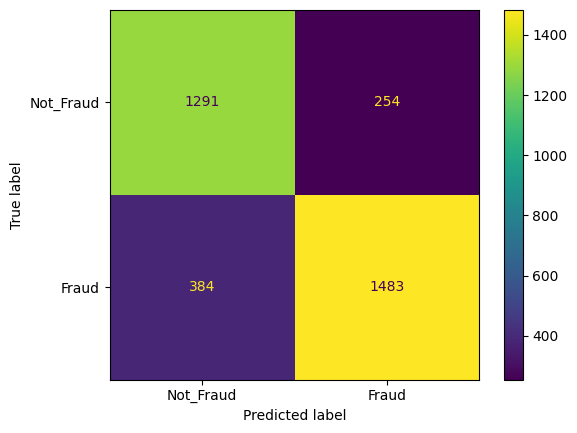

In [16]:
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Not_Fraud', 'Fraud'])
cmd.plot()

In [17]:
y_scores = cross_val_predict(Sclf, X_test, y_test, cv=3, method="decision_function")

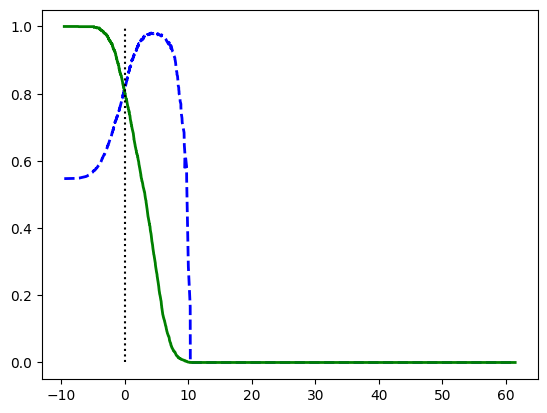

In [18]:
precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores)

plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(0, 0, 1.0, "k", "dotted", label="threshold")
plt.show()

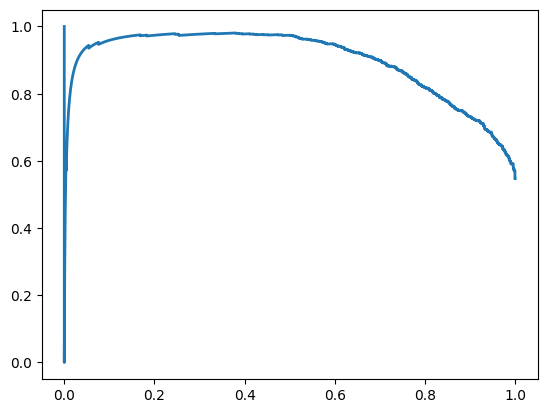

In [19]:
plt.plot(recalls, precisions, linewidth=2, label="Precision/Recall curve")
plt.show()

In [20]:
rec40 = (recalls <= 0.95).argmax()
t40 = thresholds[rec40]
t40

-2.112238314353098

In [21]:
y_test_rec_40 = (y_scores >= t40)
print(recall_score(y_test, y_test_rec_40))
print(precision_score(y_test, y_test_rec_40))

0.9496518478843063
0.6723549488054608


In [22]:
clf_dt = DecisionTreeClassifier(random_state=42)
clf_dt = clf_dt.fit(X_train, y_train)

path = clf_dt.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
ccp_alphas = ccp_alphas[:-1]

clf_dts = []

for i in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=i)
    clf_dt.fit(X_train, y_train)
    clf_dts.append(clf_dt)

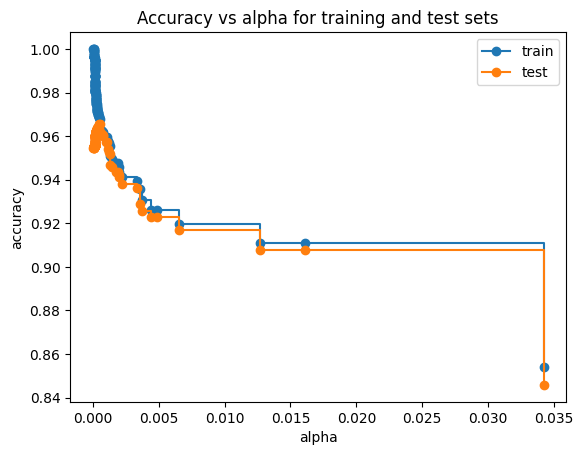

In [23]:
train_scores = [clf_dt.score(X_train, y_train) for clf_dt in clf_dts]
test_scores = [clf_dt.score(X_test, y_test) for clf_dt in clf_dts]

fig, ax = plt.subplots()
ax.set_xlabel('alpha')
ax.set_ylabel('accuracy')
ax.set_title('Accuracy vs alpha for training and test sets')
ax.plot(ccp_alphas, train_scores, marker='o', label='train', drawstyle='steps-post')
ax.plot(ccp_alphas, test_scores, marker='o', label='test', drawstyle='steps-post')
ax.legend()
plt.show()

<Axes: xlabel='tree'>

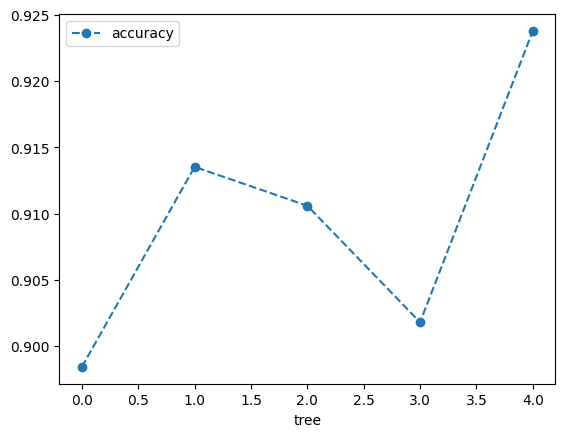

In [24]:
clf_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=0.0075)

scores = cross_val_score(clf_dt, X_train, y_train, cv=5)
df = pd.DataFrame(data={'tree': range(5), 'accuracy':scores})

df.plot(x='tree', y='accuracy', marker='o', linestyle='--')